## Assignment 3 - Competitive Assignment
An explanation this assignment could be found in the .pdf explanation document

### Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# imports for reading and writing (input & output) files:
import pandas as pd
import os

In [2]:
### add whatever imports you need
# YOUR CODE HERE
import numpy as np # linear algebra
import re
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import seaborn as sns
import matplotlib.pyplot as plt


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [3]:
train_filename = '.' + os.sep + 'input' + os.sep + 'annotated_corpus_for_train.xlsx'
test_filename  = '.' + os.sep + 'input' + os.sep + 'corpus_for_test.xlsx'
df_train = pd.read_excel(train_filename, 'corpus', index_col=None, na_values=['NA'])
df_test  = pd.read_excel(test_filename,  'corpus', index_col=None, na_values=['NA'])

In [4]:
df_train.head(8)

story gender
0  בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...      m
1  לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...      m
2  השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...      m
3  לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...      m
4  יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...      m
5  בשנה האחרונה חוויתי את מגפת הקורונה שהכריח את ...      m
6  בסמסטר קודם אני וכמה חברים ללימודים קבענו להיפ...      m
7  בשנה האחרונה למרות שלא היו יותר מידיי דברים לע...      f

In [5]:
df_test.head(3)

test_example_id                                              story
0                0  כחלק ממסגרת ההתנדבות שלי במגלה אני הולך לפעמיי...
1                1  לפני שנה החלטתי שאני רוצה להיות טייס, התחלתי ל...
2                2  בתקופת הקורונה של תחילת החיסונים נגד קורונה, א...

### Your implementation:
Write your code solution in the following code-cells

In [6]:
# YOUR CODE HERE
print("Columns in Dataset",df_train.columns)
print("Shape of training data",df_train.shape)
print("Shape of testing data",df_test.shape)

Columns in Dataset Index(['story', 'gender'], dtype='object')
Shape of training data (364, 2)
Shape of testing data (156, 2)


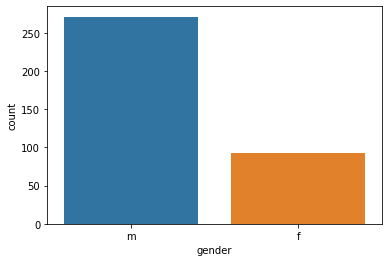

In [7]:
# YOUR CODE HERE
label = df_train['gender']
sns.countplot(label)

## Label Encoding

In [8]:
# YOUR CODE HERE
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)
print(label)


[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0]


Note that male = 1 and female = 0

In [9]:
# Add as many code cells as you need
# YOUR CODE HERE
train = df_train['story']
test = df_test['story']

In [10]:
# feature extraction using count vectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,1))
train = count_vectorizer.fit_transform(train)
test = count_vectorizer.transform(test)
print(train.shape)
print(test.shape)

(364, 22113)
(156, 22113)


In [11]:
# split traiing data into train and validation set
x_train,x_val,y_train,y_val = train_test_split(train,label,test_size = 0.2,shuffle=True,random_state = 3)

# K Nearest Neighbour

0.62
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        26
           1       0.71      0.68      0.70        47

    accuracy                           0.62        73
   macro avg       0.59      0.59      0.59        73
weighted avg       0.62      0.62      0.62        73



****************************************************************************************************
0.63
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        26
           1       0.78      0.60      0.67        47

    accuracy                           0.63        73
   macro avg       0.63      0.64      0.62        73
weighted avg       0.67      0.63      0.64        73



****************************************************************************************************
0.68
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        26
           1    

D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




****************************************************************************************************
0.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.63      0.96      0.76        47

    accuracy                           0.62        73
   macro avg       0.32      0.48      0.38        73
weighted avg       0.41      0.62      0.49        73



****************************************************************************************************
0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



****************************************************************************************************


D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


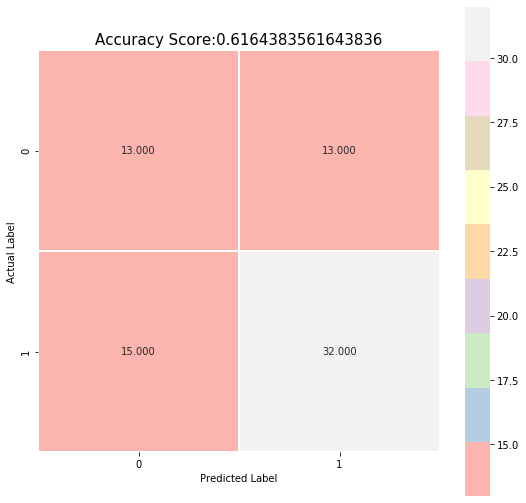

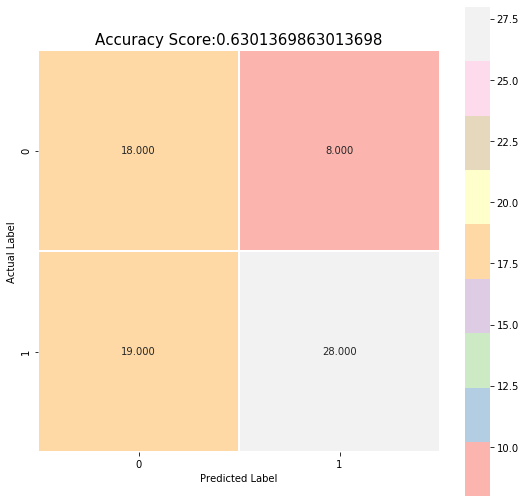

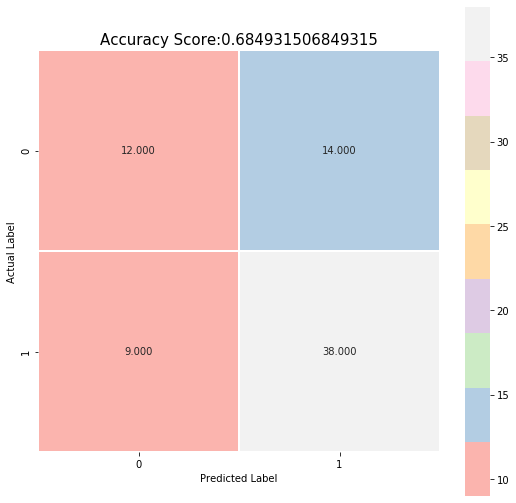

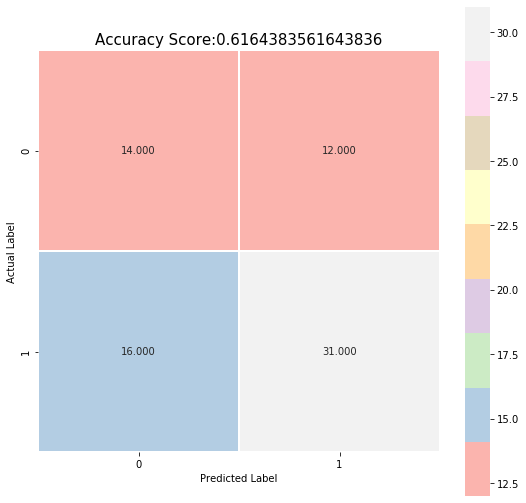

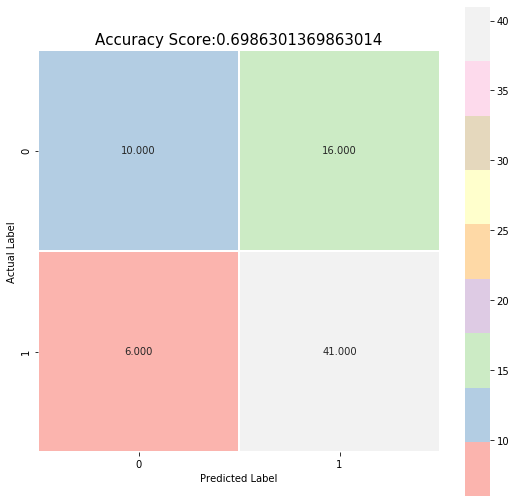

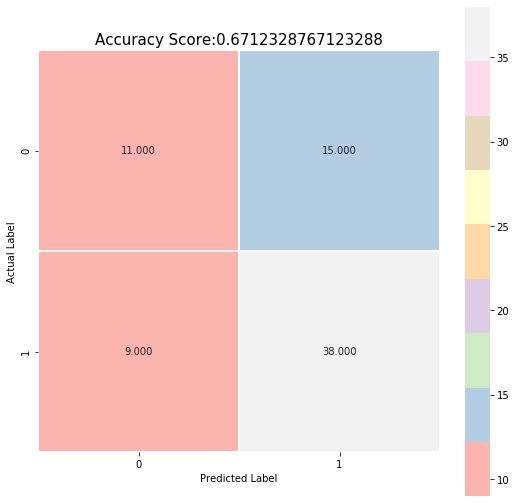

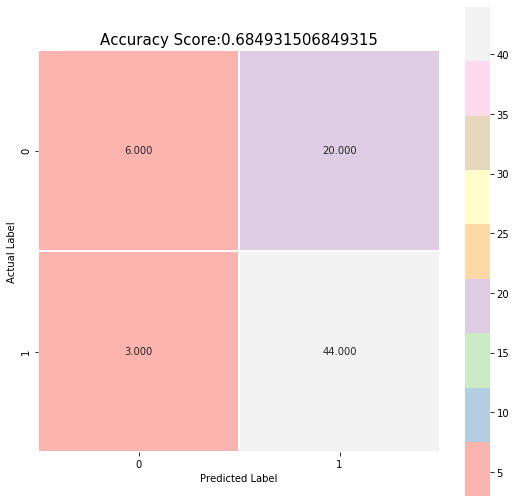

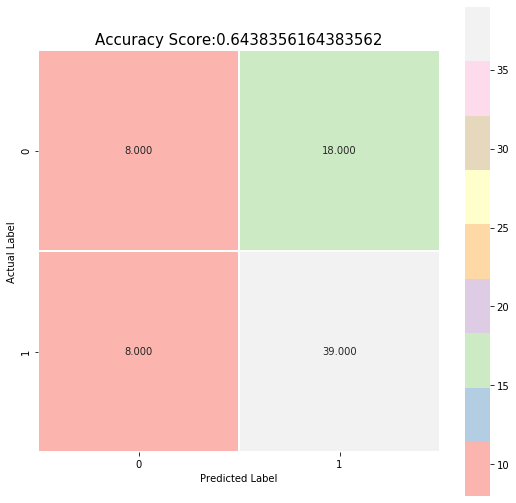

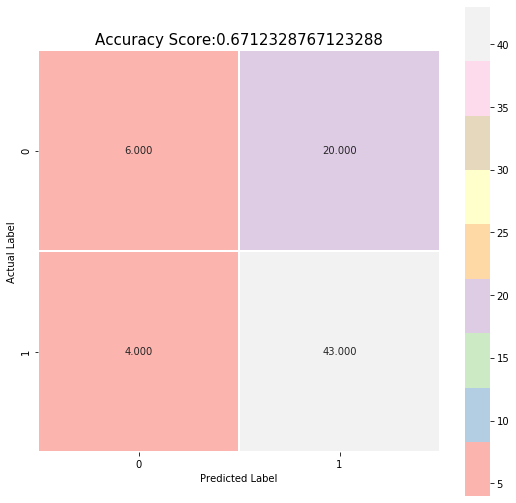

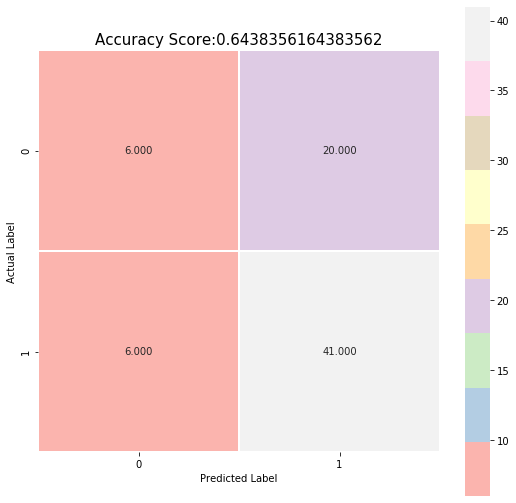

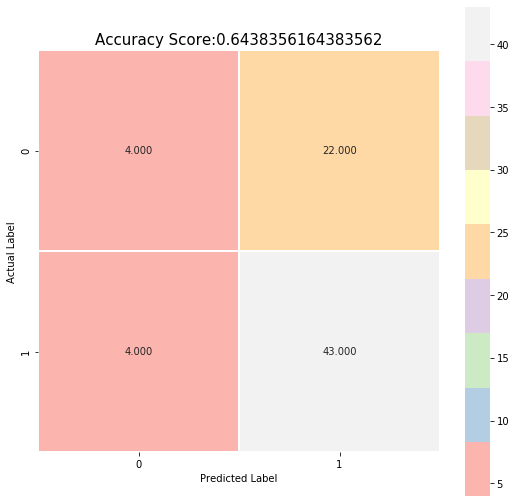

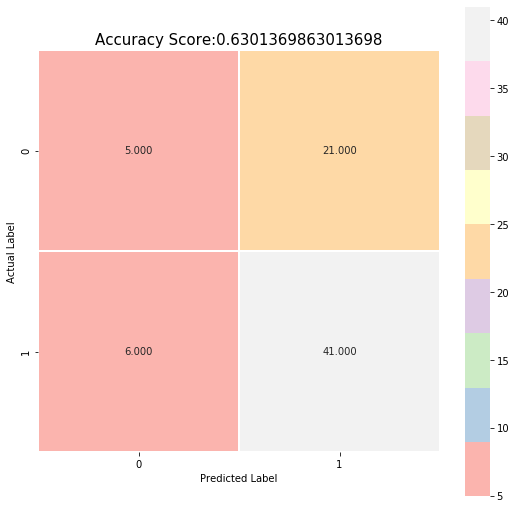

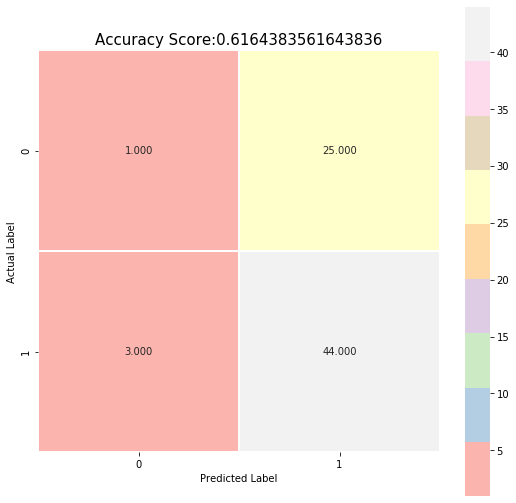

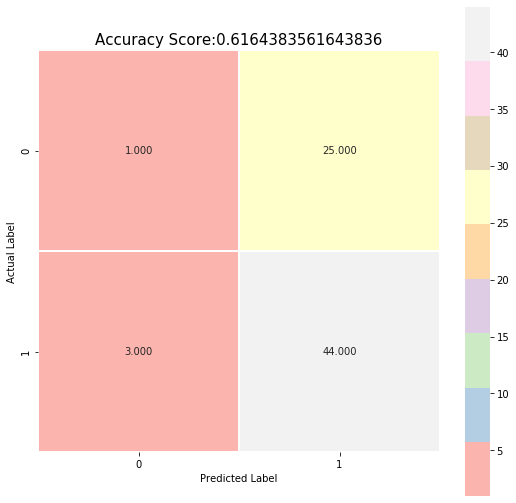

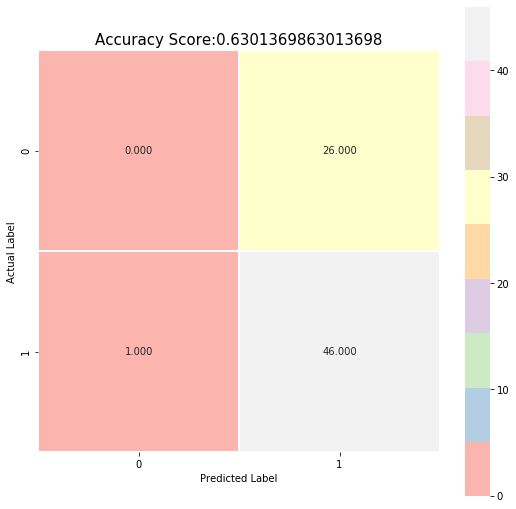

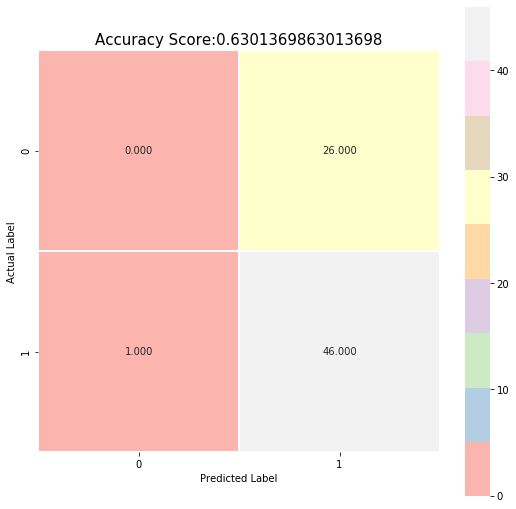

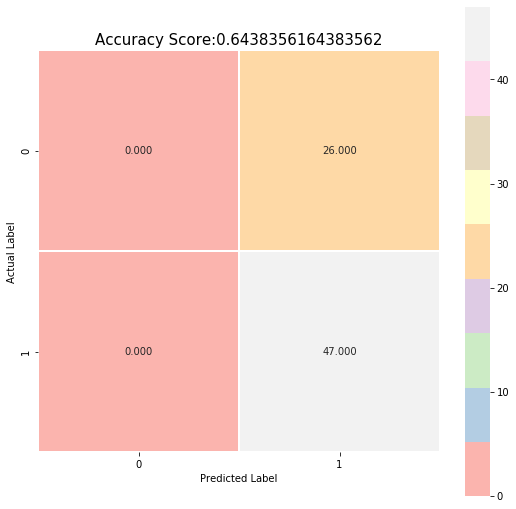

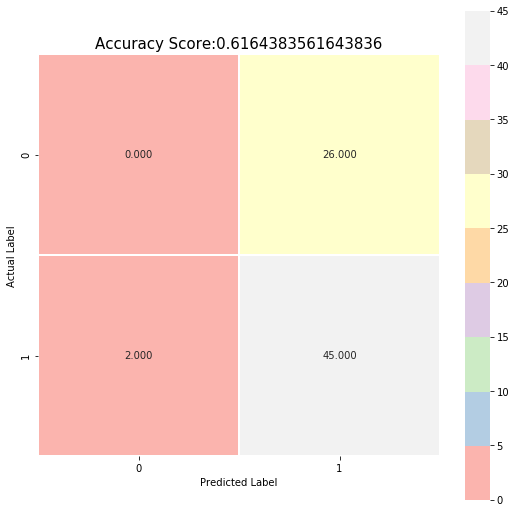

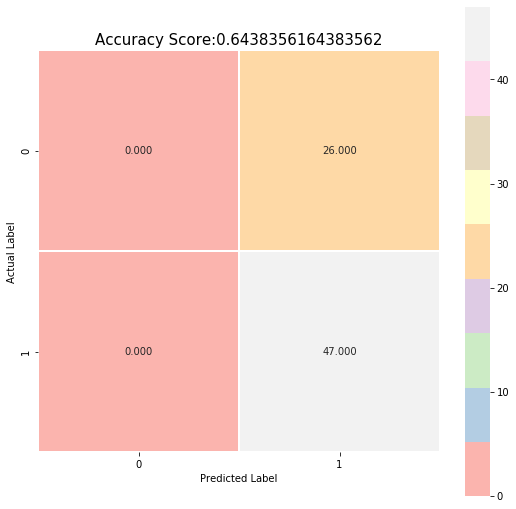

In [17]:
error=[]
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_val)
    
    accuracy = accuracy_score(y_val, y_pred) 
    print(round(accuracy,2))
    print(classification_report(y_val, y_pred))
    
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
    plt.ylabel("Actual Label");
    plt.xlabel("Predicted Label");
    all_sample_title='Accuracy Score:{0}'.format(accuracy)
    plt.title(all_sample_title,size=15);

    print()
    print()
    
    print("*"*100)

# Gaussian NB

accuracy =  0.66
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.65      1.00      0.79        47

    accuracy                           0.66        73
   macro avg       0.83      0.52      0.43        73
weighted avg       0.78      0.66      0.53        73



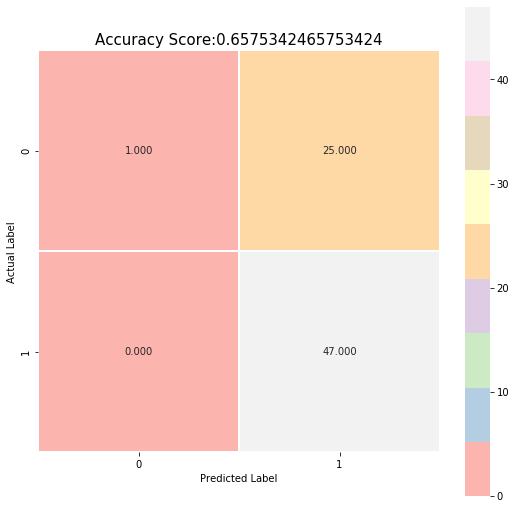

In [18]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train.toarray(), y_train).predict(x_val.toarray())

accuracy = accuracy_score(y_val, y_pred) 
print("accuracy = ",round(accuracy,2))
print(classification_report(y_val, y_pred))
    
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Support Vector Classifier (SVC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



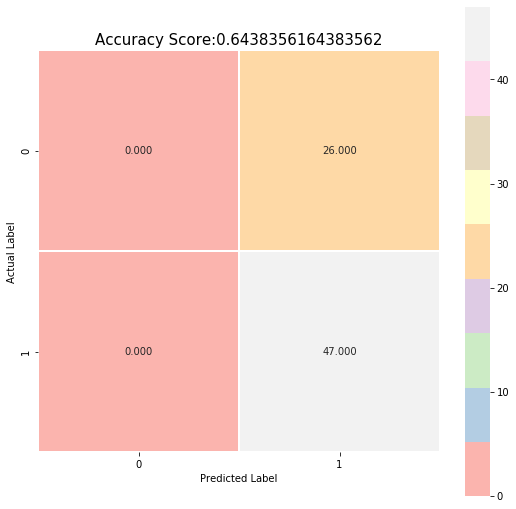

In [20]:
svc_model = svm.SVC(kernel = 'rbf', gamma = 'auto',random_state = 0)
svc_model
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Random Forest

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.66
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.65      1.00      0.79        47

    accuracy                           0.66        73
   macro avg       0.83      0.52      0.43        73
weighted avg       0.78      0.66      0.53        73



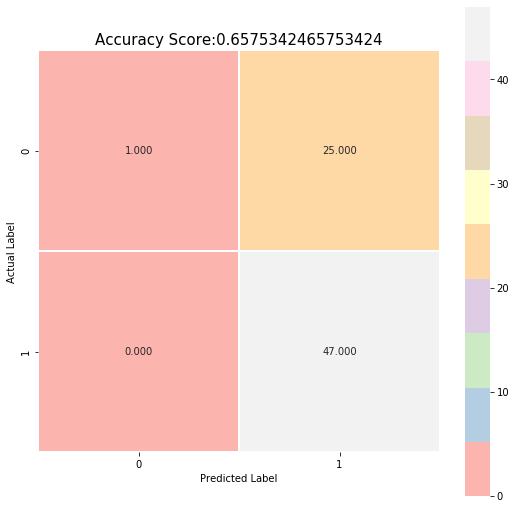

In [21]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
y_pred = random_forest_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Bernoulli NB

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


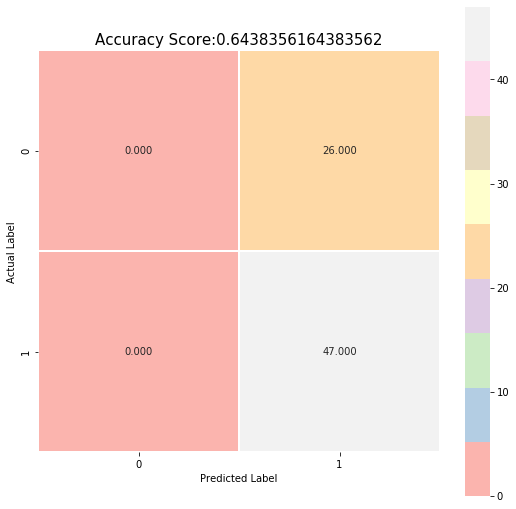

In [22]:
bernoulliNB_model = BernoulliNB()
bernoulliNB_model.fit(x_train,y_train)
y_pred = bernoulliNB_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Gradient Boosting Classifier

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
accuracy =  0.62
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        26
           1       0.65      0.89      0.75        47

    accuracy                           0.62        73
   macro avg       0.51      0.50      0.46        73
weighted avg       0.55      0.62      0.55        73



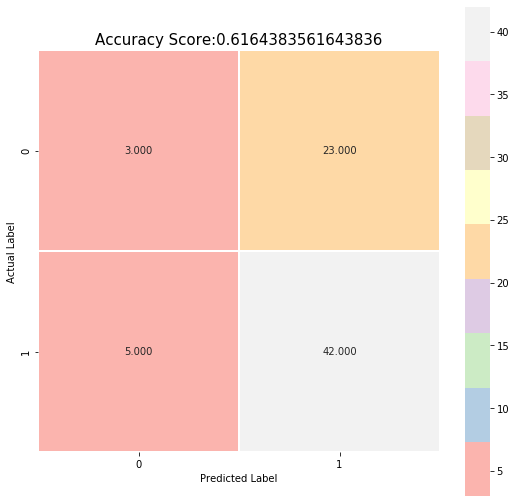

In [23]:
gradientBoosting_model = GradientBoostingClassifier()
gradientBoosting_model.fit(x_train,y_train)
y_pred = gradientBoosting_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Logistic Regression

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
accuracy =  0.71
              precision    recall  f1-score   support

           0       0.78      0.27      0.40        26
           1       0.70      0.96      0.81        47

    accuracy                           0.71        73
   macro avg       0.74      0.61      0.61        73
weighted avg       0.73      0.71      0.66        73



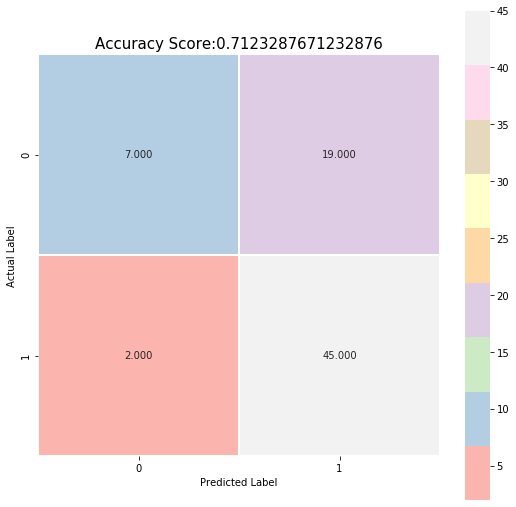

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Nultinomial NB

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.66
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        26
           1       0.66      0.98      0.79        47

    accuracy                           0.66        73
   macro avg       0.66      0.53      0.46        73
weighted avg       0.66      0.66      0.56        73



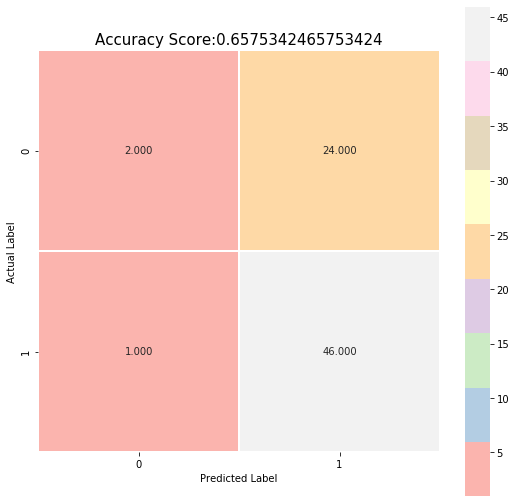

In [25]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# XGBoost

In [26]:

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_val, y_val)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred>0.5)
    print ("SCORE:", accuracy)
    print(classification_report(y_val,y_pred))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [27]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

D:\Anaconda3\envs\tf_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                 
0.6438356164383562                                     
              precision    recall  f1-score   support  

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

  1%|          | 1/100 [00:01<01:49,  1.11s/trial, best loss: -0.6438356164383562]

D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SCORE:                                                                            
0.3561643835616438                                                                
              precision    recall  f1-score   support                             

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                            
0.3561643835616438                                                                
              precision    recall  f1-score   support                             

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted av

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weigh

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weigh

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

# SGD Classifier

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1]
accuracy =  0.75
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        26
           1       0.72      1.00      0.84        47

    accuracy                           0.75        73
   macro avg       0.86      0.65      0.65        73
weighted avg       0.82      0.75      0.71        73



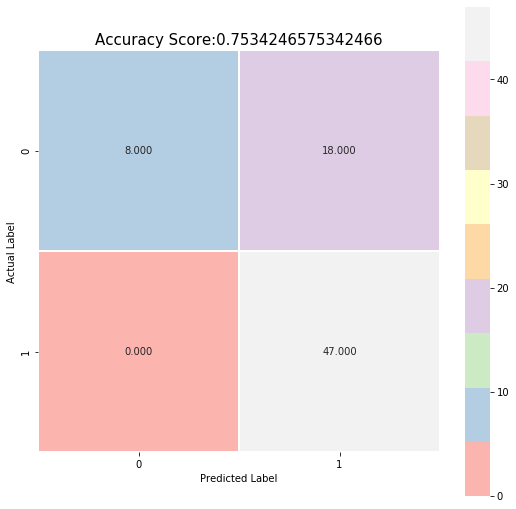

In [12]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Save Best Model

In [13]:
import pickle
pickle.dump(sgd,open('saved model/sgd model.pkl','wb'))

# Make Prediction on Test Data and Save Results

In [17]:
df_predicted = df_test.copy()
print(df_predicted)
df_predicted.drop('story',axis=1,inplace=True)
print(df_predicted)

     test_example_id                                              story
0                  0  כחלק ממסגרת ההתנדבות שלי במגלה אני הולך לפעמיי...
1                  1  לפני שנה החלטתי שאני רוצה להיות טייס, התחלתי ל...
2                  2  בתקופת הקורונה של תחילת החיסונים נגד קורונה, א...
3                  3  כפי שכולם מכירים או שמעו מחברים עולם הדייטים ה...
4                  4  אחת החוויות שהכי זכורות לי, זו החוויה בפרו בטי...
..               ...                                                ...
151              151  לא הרבה יודעים אך אני מתעסק הרבה בשוק ההון ובמ...
152              152  כשהייתי בן 4 נולד לי אח קטן, אני חייב להודות ש...
153              153  הכל התחיל אי שם בגיל ההתבגרות, היתה לי חברה מו...
154              154  נסעתי עם חברים לים, היה יום חם ורצינו ללכת לנצ...
155              155  הייתי בכיתה י,  ואני והשכבה של יצאנו לטיול שנת...

[156 rows x 2 columns]
     test_example_id
0                  0
1                  1
2                  2
3                  3
4      

In [22]:
model = pickle.load(open('saved model/sgd model.pkl', 'rb'))
#file = pd.read_csv('corpus_for_test.csv',encoding='UTF-8')

prediction = model.predict(test)
print(prediction)

prediction = list(prediction)
pred = []

for i in prediction:
    if i == 1:
        x = 'm'
    elif i == 0:
        x = 'f'
        
    pred.append(x)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1]


### Save output to csv
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [23]:
df_predicted['Model_prediction'] = pred
df_predicted.to_csv('classification_results.csv',index=False)